In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import statsmodels.stats.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# ignorando alertas (não erros)

import warnings
warnings.filterwarnings('ignore')

In [5]:
# importando o dataset
mydata = pd.read_csv('dataset/data-set-clube-new-v2.csv', sep=';')

In [6]:
mydata.tail()

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
3022,54283,ATIVO,1,1,0,12
3023,54433,ATIVO,0,1,1,1
3024,54449,ATIVO,2,1,0,1
3025,54474,ATIVO,0,1,0,0
3026,49083,ATIVO,51,4,12,15


In [7]:
# Passando os todas as colunas para o tipo inteiro

label_encoder = preprocessing.LabelEncoder()

mydata['status'] = label_encoder.fit_transform(mydata['status'])
mydata.tail()

# STATUS 0 = ATIVO
# STATUS 1 = CANCELADO (ou seja: teve "a" saída)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
3022,54283,0,1,1,0,12
3023,54433,0,0,1,1,1
3024,54449,0,2,1,0,1
3025,54474,0,0,1,0,0
3026,49083,0,51,4,12,15


Text(0.5, 0, 'Status')

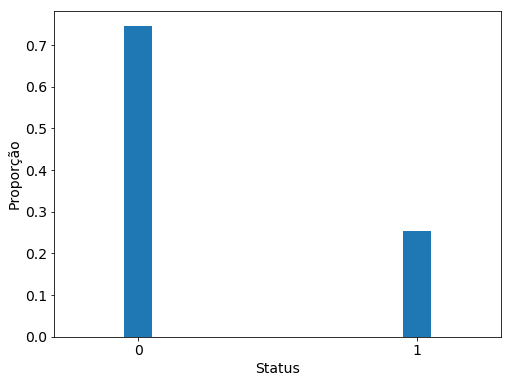

In [8]:
plt.figure(figsize(8,6))
stat = mydata.groupby('status')['status'].agg(lambda x : float(len(x))/mydata.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.1)
plt.xticks(rotation=0)
plt.ylabel('Proporção', fontsize=14)
plt.xlabel('Status', fontsize=14)

In [9]:
# escolhendo as colunas para a base de teste

y = mydata[['qtde_em_aberto', 'status','qtde_em_dia', 'qtde_em_atraso', 'qtde_frequencia_ano']]
y.head()

,qtde_em_aberto,status,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,24,1,0,0,0
1,0,1,0,0,0
2,12,1,1,2,4
3,9,1,1,2,0
4,14,1,1,0,7


In [30]:
# Separamos 25% do conjunto para o controle de previsão de qualidade.

X_train, X_test, y_train, y_test = train_test_split(mydata.ix[:, mydata.columns != 'status'], 
                                                    mydata['status'], 
                                                    test_size=0.25)

In [11]:
# média disponível no conjunto de treinamento

np.mean(y_train)

0.25594713656387663

In [12]:
# Obtendo o erro quadrado médio no conjunto de treinamento.

sqrt(mean_squared_error([np.mean(y_train)]*len(y_train), y_train))

0.43639225456993275

In [13]:
# # Obtendo o erro quadrado médio no conjunto de teste.

sqrt(mean_squared_error([np.mean(y_train)]*len(y_test), y_test))

0.4336115319418808

In [14]:
# Na amostra de teste, o erro é maior, pois avaliamos a média pelo ensino.

regressor = LinearRegression()
regressor.fit(X_train['qtde_em_aberto'].values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
y_train_predictions = regressor.predict(X_train['qtde_em_aberto'].values.reshape(-1,1))

In [27]:
y_test_predictions = regressor.predict(X_test['qtde_em_aberto'].values.reshape(-1,1))

In [17]:
# Os erros de previsão diminuíram

sqrt(mean_squared_error(y_train_predictions, y_train))

0.3802724928144867

In [18]:
sqrt(mean_squared_error(y_test_predictions, y_test))

0.37199018292720876

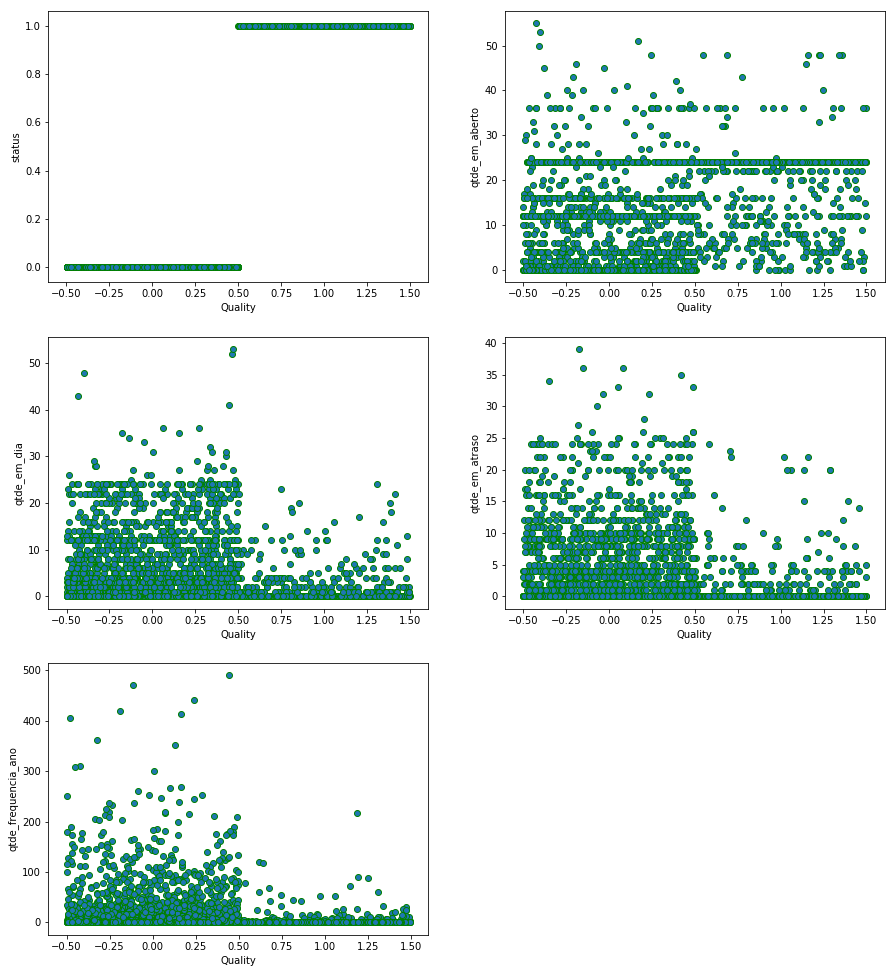

In [19]:
def fun(v):
    return v + np.random.uniform(low=-0.5, 
                                 high=0.5, 
                                 size=len(v))

pyplot.figure(figsize(15, 35))

for i in range (1, 6):
    pyplot.subplot(6, 2, i)
    pyplot.scatter(fun(mydata['status']), mydata.ix[:, i], 
                   edgecolors="green")
    pyplot.xlabel('Quality')
    pyplot.ylabel(str(mydata.columns[i]))

In [20]:
# Construindo o modelo de regressão linear.

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
# os erros da previsão diminuíram

sqrt(mean_squared_error(lm.predict(X_train), y_train))

0.3687124754248958

In [22]:
sqrt(mean_squared_error(lm.predict(X_test), y_test))

0.36628468760006944

In [36]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)

In [37]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.19921815388052921

In [39]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.31720779438758484

In [42]:
# O coeficiente de determinação para a randon forest

rf.score(X_test, y_test)

0.4702840543081286

Text(0.5, 0, 'Difference of absolute errors')

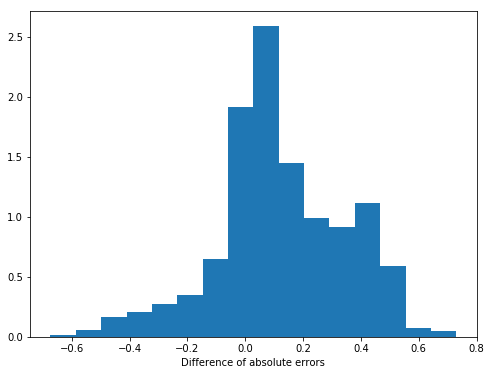

In [43]:
# Comparamos os erros da regressão linear e da randon forest

plt.figure(figsize(8,6))
plt.hist(abs(y_test - lm.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=16, normed=True)
plt.xlabel('Difference of absolute errors')

In [44]:
# As diferenças entre os erros absolutos médios:

tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - lm.predict(X_test))), 
                         sm.DescrStatsW(abs(y_test - rf.predict(X_test))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

1.1408852562584238e-20

In [45]:
# Intervalo de confiança de 97% para a diferença média de erros absolutos.

tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.09718275654607272, 0.1480322736675611)